#    **Анализ данных такси в Перу**
----------
Мини-проект

# Введение
Данный проект направлен на анализ данных о такси в Перу, собранных с помощью различных платформ для заказа такси. Основная цель исследования — выявить ключевые закономерности, понять зависимости между различными переменными, а также проверить несколько гипотез, связанных с поведением пользователей, водителей и сезонными колебаниями в заказах.


# Цель
Целью данного проекта является проведение комплексного анализа данных о такси в Перу с использованием статистических и визуализированных методов.

# Входные данные
----------

 * journey_id – уникальный id поездки
 * user_id – id пользователя
 * driver_id – id водителя
 * taxi_id – id машины
 * icon – тип поездки
 * start_type – тип заказа (asap, reserved, delayed)
 * start_at – время начала поездки
 * start_lat – исходное местоположение пользователя, широта
 * start_lon – исходное местоположение пользователя, долгота
 * end_at – время окончания поездки
 * end_lat – итоговое местоположение, широта
 * end_lon – итоговое местоположение, долгота
 * end_state – состояние заказа
 * driver_start_lat – исходное местоположение водителя, широта
 * driver_start_lon – исходное местоположение водителя, долгота
 * arrived_at – время прибытия водителя
 * source – платформа, с которой сделан заказ
 * driver_score – оценка водителя клиентом
 * rider_score – оценка клиента водителем

## Обзор данных

Составим первое представление о данных такси Перу.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Прочитаем файл <u>3_taxi_peru.csv</u> и сохраним его в переменной <u>df</u>:

In [ ]:
PATH_TO_FILE = '3_taxi_peru.csv'
df = pd.read_csv(PATH_TO_FILE, sep=';')

Выведем на экран первые десять строк таблицы:

In [ ]:
df.head(10)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,arrived_at,source,driver_score,rider_score,wait_time,month,season,is_holiday,day_of_week,is_weekend
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,2010-11-16 17:29:00,iPhone,5.0,5.0,2700.0,November,Осень,False,1,False
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,2010-06-01 00:37:00,iPhone,NaN,NaN,180.0,June,Зима,False,1,False
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,2010-05-31 05:04:00,iPhone,NaN,NaN,180.0,May,Весна,False,0,False
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,2010-06-01 00:32:00,iPhone,NaN,NaN,180.0,June,Зима,False,1,False
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,2010-09-12 01:07:00,iPhone,4.0,5.0,4320.0,September,Зима,False,5,True
5,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-10 13:00:00,"-12,02241898","-77,10650635",2010-08-10 14:26:00,...,2010-08-10 14:26:00,iPhone,NaN,4.0,5160.0,August,Зима,False,1,False
6,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,e1332f68e81526e498e4d845235baf80,executive,reserved,2010-08-08 12:10:00,"-12,08995819","-76,9262085",2010-08-08 12:48:00,...,2010-08-08 12:48:00,iPhone,5.0,5.0,2280.0,August,Зима,False,6,True
7,2e51db3a8a77aa594aa686ff19fe6036,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-05-16 03:58:00,"-12,11347198","-77,04385376",2010-05-16 04:40:00,...,2010-05-16 04:40:00,iPhone,5.0,5.0,2520.0,May,Весна,False,6,True
8,0234eb5f7e99d581c72052f0a868289c,0234eb5f7e99d581c72052f0a869293a,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,asap,2010-07-09 05:56:00,"-12,11068311","-77,00212106",2010-07-09 06:37:00,...,2010-07-09 06:37:00,Android,0.0,4.0,2460.0,July,Зима,False,4,False
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-11-22 23:42:00,"-12,08969627","-77,03574926",2010-11-23 00:53:00,...,2010-11-23 00:53:00,Android,5.0,5.0,4260.0,November,Осень,False,0,False


Одной командой получаем общую информацию о таблице:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  source            22988 non-null  object

In [ ]:
df['start_at'] = pd.to_datetime(df.start_at)
df['end_at'] = pd.to_datetime(df.end_at)
df['arrived_at'] = pd.to_datetime(df.end_at)

Итак, в таблице 19 столбцов. Тип данных в <u>driver_score</u> и <u>rider_score</u> — float64, в других случая -object.

--------
Согласно документации к данным:

 * journey_id – уникальный id поездки
 * user_id – id пользователя
 * driver_id – id водителя
 * taxi_id – id машины
 * icon – тип поездки
 * start_type – тип заказа (asap, reserved, delayed)
 * start_at – время начала поездки
 * start_lat – исходное местоположение пользователя, широта
 * start_lon – исходное местоположение пользователя, долгота
 * end_at – время окончания поездки
 * end_lat – итоговое местоположение, широта
 * end_lon – итоговое местоположение, долгота
 * end_state – состояние заказа
 * driver_start_lat – исходное местоположение водителя, широта
 * driver_start_lon – исходное местоположение водителя, долгота
 * arrived_at – время прибытия водителя
 * source – платформа, с которой сделан заказ
 * driver_score – оценка водителя клиентом
 * rider_score – оценка клиента водителем

-------

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

-------------

Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Пропуски значений
-----
Подсчитаем, сколько в таблице пропущенных значений.

In [ ]:
df.isna().sum()

,0
journey_id,0
user_id,0
driver_id,3385
taxi_id,3385
icon,0
start_type,0
start_at,0
start_lat,0
start_lon,0
end_at,276


Создадим колонки с пропущенными значениями

In [ ]:
df_col_witn_na = [x for x in df.columns if df[x].isnull().sum() > 0]
df_col_witn_na

['driver_id',
 'taxi_id',
 'end_at',
 'end_state',
 'driver_start_lat',
 'driver_start_lon',
 'arrived_at',
 'source',
 'driver_score',
 'rider_score']

Посчитаем сумму колонок с пропущенными значениями

In [ ]:
[(x, df[x].isnull().sum()) for x in df_col_witn_na]

[('driver_id', 3385),
 ('taxi_id', 3385),
 ('end_at', 276),
 ('end_state', 12),
 ('driver_start_lat', 3490),
 ('driver_start_lon', 3490),
 ('arrived_at', 276),
 ('source', 123),
 ('driver_score', 15461),
 ('rider_score', 7721)]

Посчитаем среднее и возьмем в проценты колонок с пропущенными значениями

In [ ]:
[(x, (df[x].isnull().mean() * 100).round(3)) for x in df_col_witn_na]

[('driver_id', 14.647),
 ('taxi_id', 14.647),
 ('end_at', 1.194),
 ('end_state', 0.052),
 ('driver_start_lat', 15.101),
 ('driver_start_lon', 15.101),
 ('arrived_at', 1.194),
 ('source', 0.532),
 ('driver_score', 66.899),
 ('rider_score', 33.408)]

Рассмотрим <u>id водителя</u> и <u>id машины</u>.

In [ ]:
df[(df['driver_id'].isna()) | (df['taxi_id'].isna())]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,2010-06-01 00:37:00,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,2010-05-31 05:04:00,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,2010-06-01 00:32:00,iPhone,NaN,NaN
14,3fa8651f453319abccf9760fe64c927e,7d1f317a98447453092aa1301ebae2c5,NaN,NaN,executive,asap,2010-06-21 11:08:00,"-12,08972168","-77,01724243",2010-06-21 11:11:00,"-12,11977386","-76,99523926",not found,NaN,NaN,2010-06-21 11:11:00,iPhone,NaN,NaN
18,16ba39d30594f6050cb8ab702fc41e02,1d6bbc303a2c6584d56322b8cef26f65,NaN,NaN,executive,reserved,2010-12-07 03:00:00,"-12,0860989","-76,9014698",2010-12-06 21:59:00,"-12,0702332","-76,9537277",rider cancel,NaN,NaN,2010-12-06 21:59:00,web,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,70448b79fbfe8d1e5bdd197b40d0eb35,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-05 01:22:00,"-12,09444046","-77,00198364",2010-06-05 01:22:00,"-12,13883591","-76,99526978",rider cancel,NaN,NaN,2010-06-05 01:22:00,iPhone,NaN,NaN
8399,dd91e131888064bf7df3ce08f3d4a9d7,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:04:00,"-12,12453079","-77,02780151",2010-05-31 05:05:00,"-12,13883209","-76,99530029",rider cancel,NaN,NaN,2010-05-31 05:05:00,iPhone,NaN,NaN
8406,761a1b1e8e4103f2ac5a425564949d9f,54b4de3c953be7d11a1ea3e2b54218dc,NaN,NaN,executive,asap,2010-09-16 18:08:00,"-12,08783722","-77,06564331",2010-09-16 18:12:00,"-12,10011292","-76,96960449",not found,NaN,NaN,2010-09-16 18:12:00,iPhone,NaN,NaN
8407,1e44c0fd0a266c3719ff30410b232cff,f728194ffdb461394d105863bc59c5e4,NaN,NaN,executive,asap,2010-09-22 03:42:00,"-12,1030426","-77,014773",2010-09-22 03:45:00,"-12,129976","-77,0316186",not found,NaN,NaN,2010-09-22 03:45:00,web,NaN,NaN


Прощенные строк в <u>driver_id</u> и <u>taxi_id</u> составляем 3385.
Давайте проверим ошибка это или просто пропущенные значения

Посчитаем их <u>состояние заказа<u/>

In [ ]:
ids_drive_taxi_nan_state = df[(df['driver_id'].isna()) | (df['taxi_id'].isna())]['end_state'].value_counts().reset_index(name='count_nan')
ids_drive_taxi_nan_state

,end_state,count_nan
0,rider cancel,1981
1,not found,1143
2,failure,249


И получается, что это не ошибка, а из-за того, что rider cancel - отмена пассажиром, not found - не найден, failure - неудача, в этих трех случаях машина была не найдена, как и id таксита

Посчитаем всех <u>состояние заказа<u/>

In [ ]:
state_count = df['end_state'].value_counts().reset_index()
state_count

,end_state,count
0,drop off,17417
1,rider cancel,3976
2,not found,1145
3,driver cancel,292
4,failure,249
5,no show,20


Соединим датафреймы в один и посмотрим на процент между ними

In [ ]:
df_end_state_with_nan = state_count.merge(ids_drive_taxi_nan_state, how='inner', on='end_state')
df_end_state_with_nan['percent'] = (df_end_state_with_nan['count_nan'] / df_end_state_with_nan['count']).round(4)
df_end_state_with_nan

,end_state,count,count_nan,percent
0,rider cancel,3976,1981,0.4982
1,not found,1145,1143,0.9983
2,failure,249,249,1.0000


Эти данные соотвествуют восприятию, что rider cancel - отмена пассажиром, not found - не найден, failure - неудача, в этих трех случаях машина была не найдена, как и id таксита.



--------
### Дубликаты

In [ ]:
df.duplicated().sum()

0

### Проверка гипотез
---------
###### Первая гипотеза
-----
Первая гипотеза заключается в том, что заказы типа <u>забронированные</u> могут иметь меньшее время ожидания, чем заказы типа <u>как можно скорее</u>. Мы будем проверять эту гипотезу с помощью анализа времени ожидания для разных типов заказов.

In [ ]:
df[df['arrived_at'] <= df['start_at']]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
18,16ba39d30594f6050cb8ab702fc41e02,1d6bbc303a2c6584d56322b8cef26f65,NaN,NaN,executive,reserved,2010-12-07 03:00:00,"-12,0860989","-76,9014698",2010-12-06 21:59:00,"-12,0702332","-76,9537277",rider cancel,NaN,NaN,2010-12-06 21:59:00,web,NaN,NaN
24,ec84a73745199ff840ecafcb928250fd,410389a59b3c36fa86e76bce43d9a336,NaN,NaN,executive,reserved,2010-05-13 20:00:00,"-12,1312973","-76,9824845",2010-05-13 18:27:00,"-12,1254832","-77,0293897",rider cancel,NaN,NaN,2010-05-13 18:27:00,web,NaN,NaN
29,1881c928349fa432c4c0cb4434807dec,e7502b492346e09de17e1542782c1af1,NaN,NaN,executive,reserved,2010-10-23 12:40:00,"-12,10833359","-77,04638672",2010-10-23 11:58:00,"-12,09195328","-77,02441406",rider cancel,NaN,NaN,2010-10-23 11:58:00,iPhone,NaN,NaN
30,fdd0e7184d1ec5e7cba69b61ee25b39b,e7502b492346e09de17e1542782c1af1,NaN,NaN,executive,reserved,2010-10-23 08:15:00,"-12,10839081","-77,04608154",2010-10-23 01:00:00,"-12,11825943","-77,03460693",rider cancel,NaN,NaN,2010-10-23 01:00:00,iPhone,NaN,NaN
33,6d246b213b4736be3c507b456717d02d,58af3d0a68980e98b9cc7d5383ee77c8,NaN,NaN,executive,reserved,2010-11-02 15:45:00,"-12,06995392","-77,10195923",2010-11-02 04:54:00,"18,98943329","-98,25964355",rider cancel,NaN,NaN,2010-11-02 04:54:00,iPhone,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23040,87cf80ef9d84f628f95fb83fea13bb75,ae06c34243f741e203e97c48eb62c195,0aa51cbf1d21c8c6462dbf0e10028a07,0aa51cbf1d21c8c6462dbf0e10027148,executive,asap,2010-10-12 02:17:00,"-12,0984162","-76,975669",2010-10-12 02:17:00,"-12,1131032","-76,9925073",drop off,0,0,2010-10-12 02:17:00,web,NaN,5.0
23071,2d163dcf6f3e01abf4af5b2a7219d39b,65b6f3b7075270499ddd0f1dc10f9ac6,eeb07ac5409c082354b923689341b9ec,aba044a086704ad7e9dc66b8c926408d,executive,reserved,2010-03-22 16:00:00,"-12,0978667","-77,01438",2010-03-22 15:50:00,"-12,0932353","-77,0267424",drop off,"-12,09771992","-77,02516426",2010-03-22 15:50:00,web,5.0,5.0
23079,427ea13a08c6774530605a1fef3a017b,3e201cdebc5a9c587d83d10ed24fddfb,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-12-03 15:57:00,"-12,105283","-77,018843",2010-12-03 15:57:00,"-12,0991","-77,03475",drop off,0,0,2010-12-03 15:57:00,web,NaN,5.0
23085,8b123be9f6cba79cfe286ab89a348cfc,380890d3043421087f00b3ca9a40e5d2,0aa51cbf1d21c8c6462dbf0e10028a07,0aa51cbf1d21c8c6462dbf0e10027148,executive,reserved,2010-09-17 14:50:00,"-12,1059635","-76,9932875",2010-09-17 14:36:00,"-12,093213","-77,0186515",rider cancel,"-12,11023948","-77,00983146",2010-09-17 14:36:00,web,NaN,NaN


Время прибытия превышает время начала поездки, так как такие данные нарушают логику — водитель не может прибыть позже, чем начнется поездка

---------------
Затем, мы создаем новый столбец wait_time, который вычисляется как разница между временем прибытия и временем начала поездки в секундах:

In [ ]:
df['wait_time'] = (df['arrived_at'] - df['start_at']).dt.total_seconds()
df['wait_time']

,wait_time
0,2700.0
1,180.0
2,180.0
3,180.0
4,4320.0
...,...
23106,720.0
23107,1800.0
23108,1320.0
23109,2460.0


Теперь, сгруппируем данные по типам заказов и вычислим статистические показатели времени ожидания:

In [ ]:
grouped_data = df[df['arrived_at'] >= df['start_at']].groupby('start_type')
summary = grouped_data['wait_time'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
start_type,,,,,,,,
asap,14682.0,1940.069473,2676.328049,0.0,240.0,1740.0,2640.0,93420.0
delayed,9.0,17566.666667,42675.680428,900.0,1080.0,1920.0,6060.0,131040.0
reserved,6869.0,6000.995778,261978.076144,0.0,1320.0,2100.0,3240.0,21713640.0


Время ожидания равно нулю, что может указывать на очень быстрое прибытие или ошибки в данных.

In [ ]:
df[df['wait_time'] == 0]['start_type'].value_counts().reset_index()

,start_type,count
0,asap,881
1,reserved,10


In [ ]:
df[df['wait_time'] == 0][['start_at', 'end_at', 'arrived_at']]

,start_at,end_at,arrived_at
45,2010-02-12 03:25:00,2010-02-12 03:25:00,2010-02-12 03:25:00
57,2010-10-15 17:01:00,2010-10-15 17:01:00,2010-10-15 17:01:00
65,2010-05-25 21:31:00,2010-05-25 21:31:00,2010-05-25 21:31:00
73,2010-11-10 20:04:00,2010-11-10 20:04:00,2010-11-10 20:04:00
126,2010-11-08 03:44:00,2010-11-08 03:44:00,2010-11-08 03:44:00
...,...,...,...
23008,2010-12-05 14:06:00,2010-12-05 14:06:00,2010-12-05 14:06:00
23027,2010-10-14 06:06:00,2010-10-14 06:06:00,2010-10-14 06:06:00
23029,2010-07-09 17:01:00,2010-07-09 17:01:00,2010-07-09 17:01:00
23040,2010-10-12 02:17:00,2010-10-12 02:17:00,2010-10-12 02:17:00


Эти данные указывают на ситуации, где время начала, прибытия и окончания совпадают, что может быть аномалией

In [ ]:
grouped_data = df[(df['arrived_at'] >= df['start_at']) & (df['wait_time'] > 0)] \
    .groupby('start_type')['wait_time']\
    .describe().reset_index()
grouped_data

,start_type,count,mean,std,min,25%,50%,75%,max
0,asap,13801.0,2063.915658,2713.738781,60.0,480.0,1800.0,2700.0,93420.0
1,delayed,9.0,17566.666667,42675.680428,900.0,1080.0,1920.0,6060.0,131040.0
2,reserved,6859.0,6009.744861,262168.908080,60.0,1320.0,2100.0,3240.0,21713640.0


Гипотеза не подтверждается. Забронированные заказы ("reserved") в среднем имеют большее время ожидания, чем заказы "как можно скорее" ("asap")

####Вторая гипотеза
-------
##### Поведение пользователей  изменяется в зависимости от времени года, что влияет на количество заказов. Например, в месяцы с большим количеством праздников и отпусков (декабрь, январь, июль) может наблюдаться рост числа заказов, так как люди чаще находятся дома или участвуют в праздничных мероприятиях, что требует использования транспортных услуг.

In [ ]:
df['month'] = df['start_at'].dt.month_name()
month_orders = df[df['end_state'] == 'drop off'].groupby('month', as_index=False)['user_id'].count()\
    .rename(columns={'user_id':'orders'}).sort_values('orders', ascending=False)
month_orders

,month,orders
2,December,2553
9,November,2415
10,October,2414
11,September,1925
1,August,1577
6,June,1421
5,July,1194
8,May,1124
0,April,1017
7,March,747


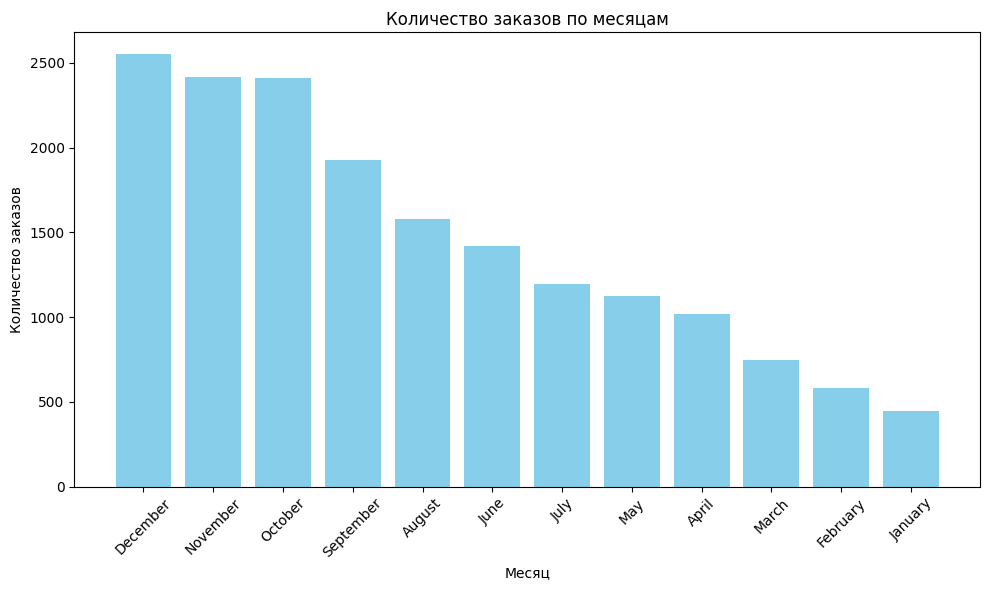

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(month_orders['month'], month_orders['orders'], color='skyblue')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

График показал значительные колебания в заказах по месяцам, что позволяет сделать вывод, что количество заказов зависит от ряда факторов, включая сезонные изменения в активности пользователей.

##### Давайте посмотроим график по сезоннам

In [ ]:
def get_season(month):
    if month in ['December', 'January', 'February', 'March']:
        return 'Лето'
    elif month in ['April', 'November']:
        return 'Осень'
    elif month in ['June', 'July', 'August', 'September']:
        return 'Зима'
    else:
        return 'Весна'

df['season'] = df['month'].apply(get_season)

season_orders = df[df['end_state'] == 'drop off'].groupby('season', as_index=False)['user_id'].count()\
    .rename(columns={'user_id': 'orders'}).sort_values('orders', ascending=False)
season_orders

,season,orders
1,Зима,6117
2,Лето,4330
0,Весна,3538
3,Осень,3432


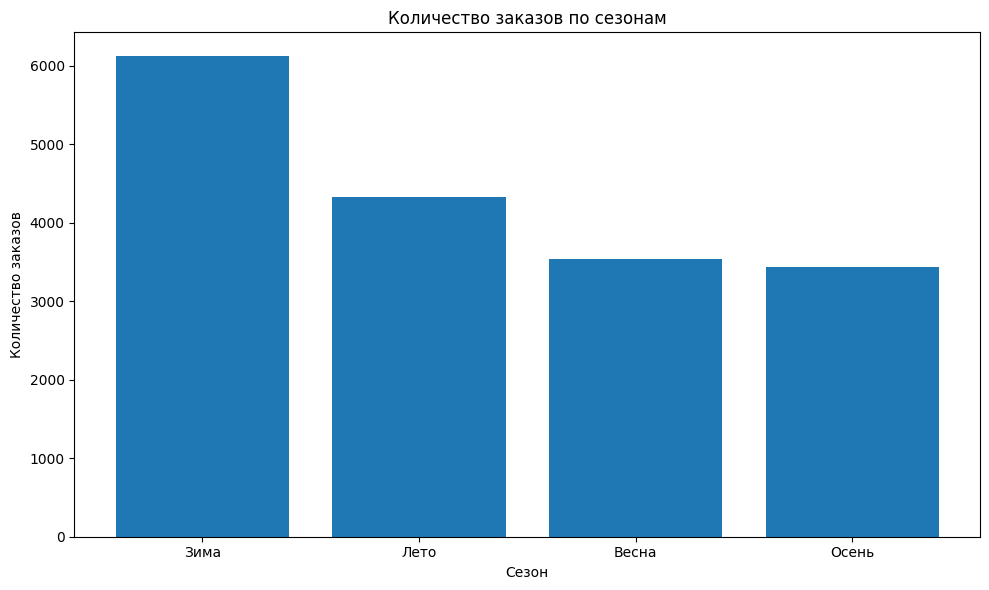

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(season_orders['season'], season_orders['orders'])
plt.title('Количество заказов по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()

Важно отметить, что в Перу зима и лето не всегда означают строгие температурные колебания, но могут быть связаны с культурными и социальными событиями, которые влияют на поведение пользователей.

In [ ]:
holidays = ['2010-01-01', '2010-04-01', '2010-04-02', '2010-04-04', '2010-05-01', '2010-07-28', '2010-07-29', '2010-10-08', '2010-11-01', '2010-12-25']
holidays = pd.to_datetime(holidays)
df['is_holiday'] = df['start_at'].dt.date.isin(holidays.date)
df['day_of_week'] = df['start_at'].dt.weekday
df['is_weekend'] = df['day_of_week'].isin([5, 6])
weekend_orders = df[df['end_state'] == 'drop off'].groupby('is_weekend')['user_id'].count().reset_index()
weekend_orders.rename(columns={'user_id': 'orders'}, inplace=True)
holiday_orders = df[df['end_state'] == 'drop off'].groupby('is_holiday')['user_id'].count().reset_index()
holiday_orders.rename(columns={'user_id': 'orders'}, inplace=True)
holiday_orders


,is_holiday,orders
0,False,17122
1,True,295


In [ ]:
weekend_orders

,is_weekend,orders
0,False,11763
1,True,5654


Гипотеза подтверждается, количество заказов существенно зависит от сезонных факторов, потому что Зима и лето демонстрируют повышенную активность, что может быть связано с социальными и культурными событиями.
Выходные и праздничные дни также оказывают заметное влияние, увеличивая количество заказов. Люди, вероятно, используют такси чаще для участия в мероприятиях или семейных встречах.

#####Третья гипотеза
------
Гипотеза, что тип заказа, зависит от плафтормы.
Возможно пользователи мобильного приложения, чаще выбираюь поездку сразу, чем пользователи, заказывающие с других платформ

In [ ]:
type_source = df.groupby(['source', 'start_type']).size().reset_index(name='order_count')
type_source

,source,start_type,order_count
0,Android,asap,3824
1,Android,delayed,20
2,Android,reserved,1065
3,Wap,asap,94
4,Wap,reserved,42
5,iPad,asap,334
6,iPad,reserved,237
7,iPhone,asap,6682
8,iPhone,reserved,3059
9,web,asap,3867


In [ ]:
type_source['total_per_source'] = type_source.groupby('source')['order_count'].transform('sum')
type_source['percentage'] = type_source['order_count'] / type_source['total_per_source'] * 100
type_source

,source,start_type,order_count,total_per_source,percentage
0,Android,asap,3824,4909,77.897739
1,Android,delayed,20,4909,0.407415
2,Android,reserved,1065,4909,21.694846
3,Wap,asap,94,136,69.117647
4,Wap,reserved,42,136,30.882353
5,iPad,asap,334,571,58.493870
6,iPad,reserved,237,571,41.506130
7,iPhone,asap,6682,9741,68.596653
8,iPhone,reserved,3059,9741,31.403347
9,web,asap,3867,7631,50.674879


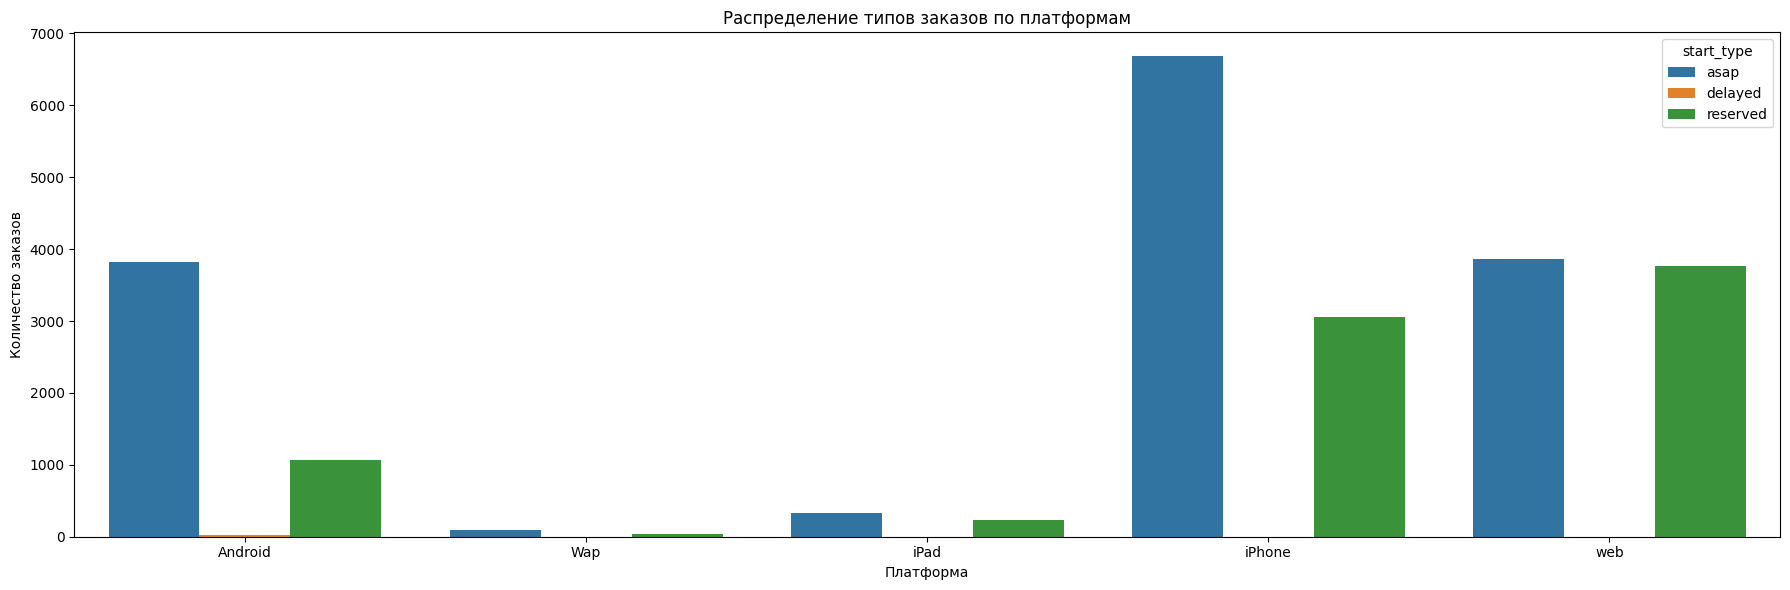

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='source', y='order_count', hue='start_type', data=type_source)
plt.title('Распределение типов заказов по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()

Гипотеза подтверждается: тип заказа зависит от платформы.
Мобильные пользователи чаще выбирают поездки "asap". Это связано с тем, что мобильные устройства, вероятно, используются в условиях срочности.Пользователи web и iPad чаще планируют поездки заранее, что объясняется использованием этих устройств, например, дома или в офисе.


##### Четвертая гипотеза
--------
###### Гипотеза заключается в том, что поведение водителей, связанные с опозданиями, имеет зависимость от общего числа совершённых поездок. В частности, водители, которые совершают больше поездок, могут быть более склонны к опозданиям, что необходимо учитывать для улучшения контроля пунктуальности.

In [ ]:
a = ['asap', 'reserved']
taxi = df.query('start_type in @a')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,arrived_at,source,driver_score,rider_score,wait_time,month,season,is_holiday,day_of_week,is_weekend
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,2010-11-16 17:29:00,iPhone,5.0,5.0,2700.0,November,Осень,False,1,False
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,2010-06-01 00:37:00,iPhone,NaN,NaN,180.0,June,Зима,False,1,False
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,2010-05-31 05:04:00,iPhone,NaN,NaN,180.0,May,Весна,False,0,False
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,2010-06-01 00:32:00,iPhone,NaN,NaN,180.0,June,Зима,False,1,False
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,2010-09-12 01:07:00,iPhone,4.0,5.0,4320.0,September,Зима,False,5,True


In [ ]:
drivers_late = taxi.query('(start_type == "reserved") & (wait_time > 0)')\
    .groupby('driver_id', as_index=False)\
    .agg({'user_id':'count'})\
    .rename(columns={'user_id':'trips_count'})\
    .sort_values('trips_count', ascending=False)
drivers_late

,driver_id,trips_count
117,d665fb9f75ef5d9cd0fd89479380ba78,557
107,c814db2127582cf95dea1f74f43127c2,368
141,ff5c924e0b630fd7c019a4234059fdf4,351
33,406921adcca37705ef527b4246c0cfea,349
32,406921adcca37705ef527b4246bbbff5,326
...,...,...
42,54c88ff5110a79082d341066aa4483a6,1
46,587ea1ea1ab415acb010ec8308275095,1
85,a7b047c6a09ccb85e9980d80ffaadb3d,1
88,acf45a789a8ff88fb94179627131d87c,1


In [ ]:
users_taxi = taxi['driver_id'].value_counts().reset_index(name='trips').rename(columns={'index':'driver_id'})
users = users_taxi.merge(drivers_late, how='inner', on='driver_id')
users

,driver_id,trips,trips_count
0,c814db2127582cf95dea1f74f43127c2,1523,368
1,d665fb9f75ef5d9cd0fd89479380ba78,1225,557
2,ff5c924e0b630fd7c019a4234059fdf4,1111,351
3,406921adcca37705ef527b4246c0cfea,1075,349
4,ec84a73745199ff840ecafcb924383ad,974,319
...,...,...,...
137,587ea1ea1ab415acb010ec8308275095,3,1
138,784a730957c6e05508e71c604ac92700,3,2
139,7bf79d646d318c67421797bb50001810,3,2
140,fdf6154b59555655a8734629d4c65698,3,1


In [ ]:
users.corr()

,trips,trips_count
trips,1.00000,0.96259
trips_count,0.96259,1.00000


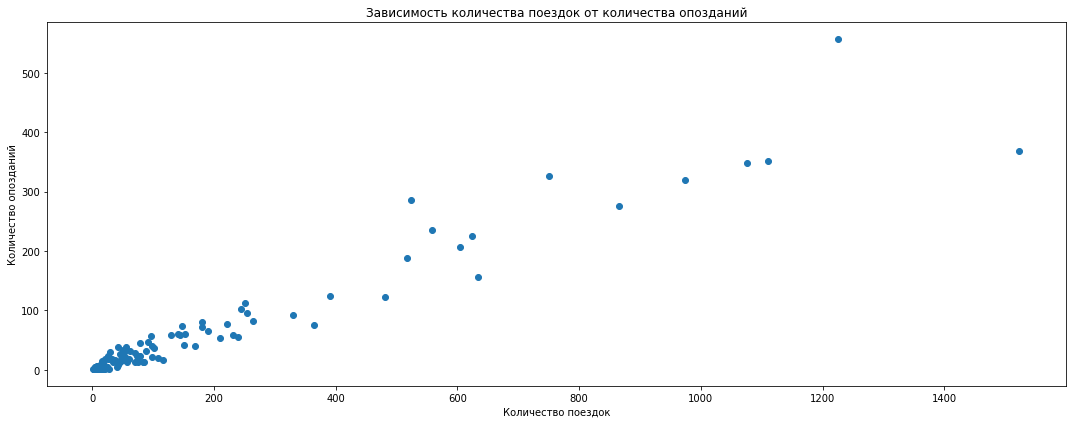

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data=users, x='trips', y='trips_count')
plt.title('Зависимость количества поездок от количества опозданий')
plt.xlabel('Количество поездок')
plt.ylabel('Количество опозданий')
plt.tight_layout()
plt.show()

Гипотеза подтверждена: водители, совершающие большее количество поездок, имеют большую склонность к опозданиям. Коэффициент корреляции между общим количеством поездок и количеством опозданий, что указывает на сильную положительную зависимость. Это означает, что с увеличением числа выполненных поездок водителями также растёт количество опозданий.


# **Вывод**
В результате анализа данных о такси в Перу было выявлено несколько интересных закономерностей, которые могут оказать значительное влияние на работу такси-сервисов. В процессе исследования было проверено несколько гипотез, проведены различные статистические и визуализационные анализы. Вот основные выводы, полученные в ходе работы:

- **Пропущенные значения и их причины**: Анализ пропусков показал, что большинство данных с отсутствующими значениями связано с отменами заказов, отсутствием водителей или машин, а также с неудачными поездками. Проблема с отсутствием данных по водителям и машинам в большинстве случаев объясняется состоянием заказа, таким как «rider cancel», «not found» или «failure». Эти пропуски не являются ошибками, а следствием логики работы сервиса.

- **Типы заказов и время ожидания**: Гипотеза о том, что забронированные заказы имеют меньшее время ожидания, не подтвердилась. Напротив, заказы типа «reserved» в среднем имеют большее время ожидания, чем заказы типа «asap». Это может быть связано с тем, что забронированные поездки обычно планируются заранее и могут включать больше времени на подготовку или организацию.

- **Сезонность и количество заказов**: Анализ сезонных колебаний показал, что количество заказов действительно зависит от времени года, с явным увеличением заказов в летний и зимний сезоны, что связано с культурными и социальными событиями в эти периоды. Праздничные и выходные дни также существенно увеличивают количество заказов, что подтверждает важность учета этих факторов при планировании ресурсов.

- **Платформы и типы заказов**: Тип заказа значительно зависит от платформы. Мобильные пользователи часто выбирают заказы типа «asap», что подтверждает гипотезу о высоком уровне срочности при использовании мобильных приложений. В то время как пользователи web и iPad, скорее всего, планируют поездки заранее, выбирая тип «reserved».

- **Зависимость опозданий от количества поездок водителя**: Проведенный анализ показал, что водители с большим количеством выполненных поездок имеют тенденцию к большему количеству опозданий. Это подтверждает гипотезу, что опыт водителя и частота его поездок могут влиять на его пунктуальность, что требует внимания со стороны такси-сервисов для улучшения контроля за выполнением стандартов по времени.